In [1]:
# Load libraries
import random
import torch
from plot_lib import set_default, show_mat
from matplotlib.pyplot import plot, subplot, axhline, axvline, legend, suptitle, title
from numpy import pi as π
from numpy import sqrt, cos, arange, arccos

In [2]:
# Set style (needs to be in a new cell)
set_default(figsize=(10, 4), dpi=200)

In [3]:
# Generate a collection of 5 3D vectors on a sphere
A = torch.nn.functional.normalize(torch.randn(5, 3), p=2, dim=1)

In [4]:
# Checking the content
A

tensor([[-0.9994, -0.0347, -0.0088],
        [-0.4171,  0.3729, -0.8288],
        [ 0.4059,  0.2604, -0.8760],
        [-0.2691,  0.6318,  0.7269],
        [-0.3941,  0.8638,  0.3139]])

In [5]:
# And the norm
A.norm(p=2, dim=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

In [6]:
# Change the value of the dimensionality d
d = 8  # 1, 2, [3], 5, 8
A = torch.nn.functional.normalize(torch.randn(10, d), 2, 1)

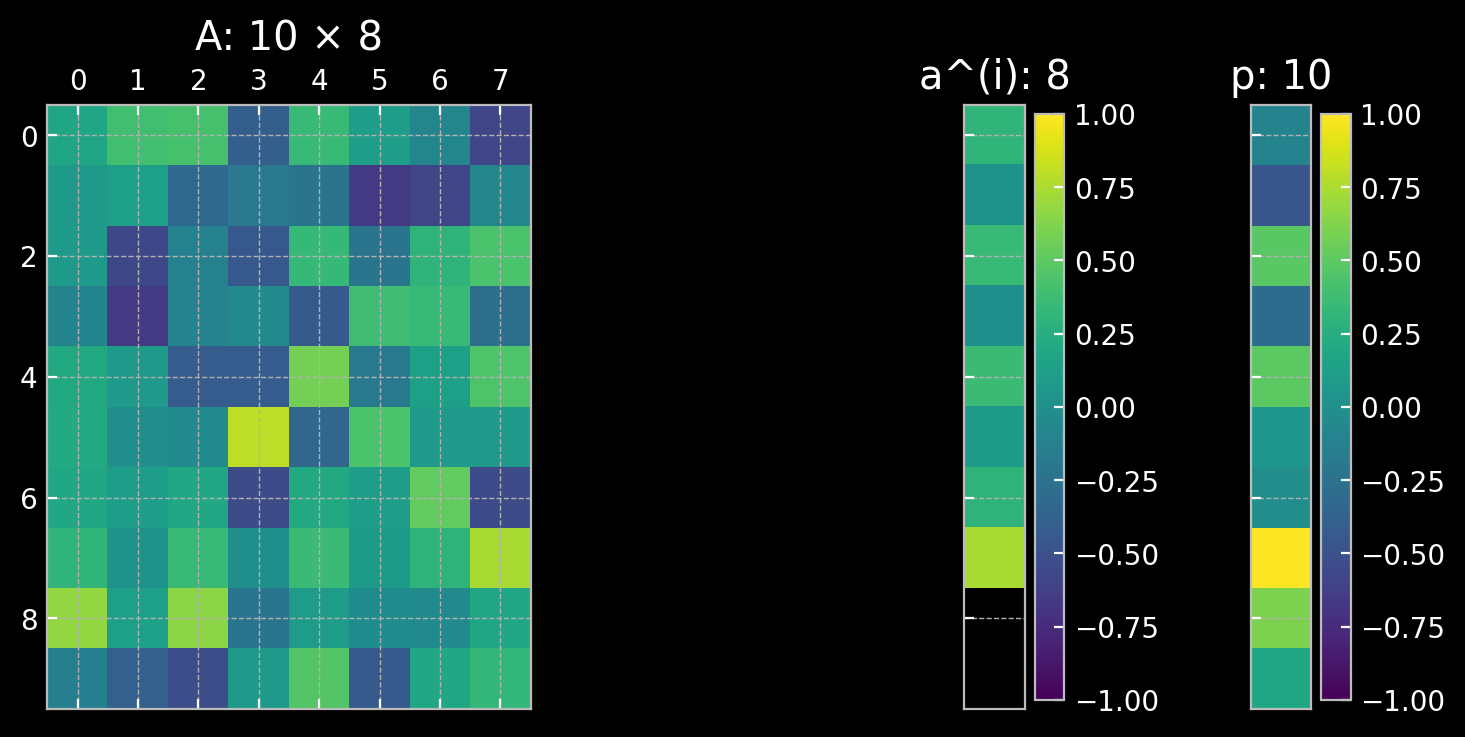

In [7]:
# Run this multiple times per given d
a = A[[random.randrange(A.size(0))],:].t()  # perhaps comment, if playing with vis
p = A @ a
# p = torch.abs(A @ a)

# Plot
show_mat(A, a, p, threshold=-1)  # pick threshold ∈ [-1, +1), default -1

Text(0.5, 0.98, 'Normalised scalar product distribution')

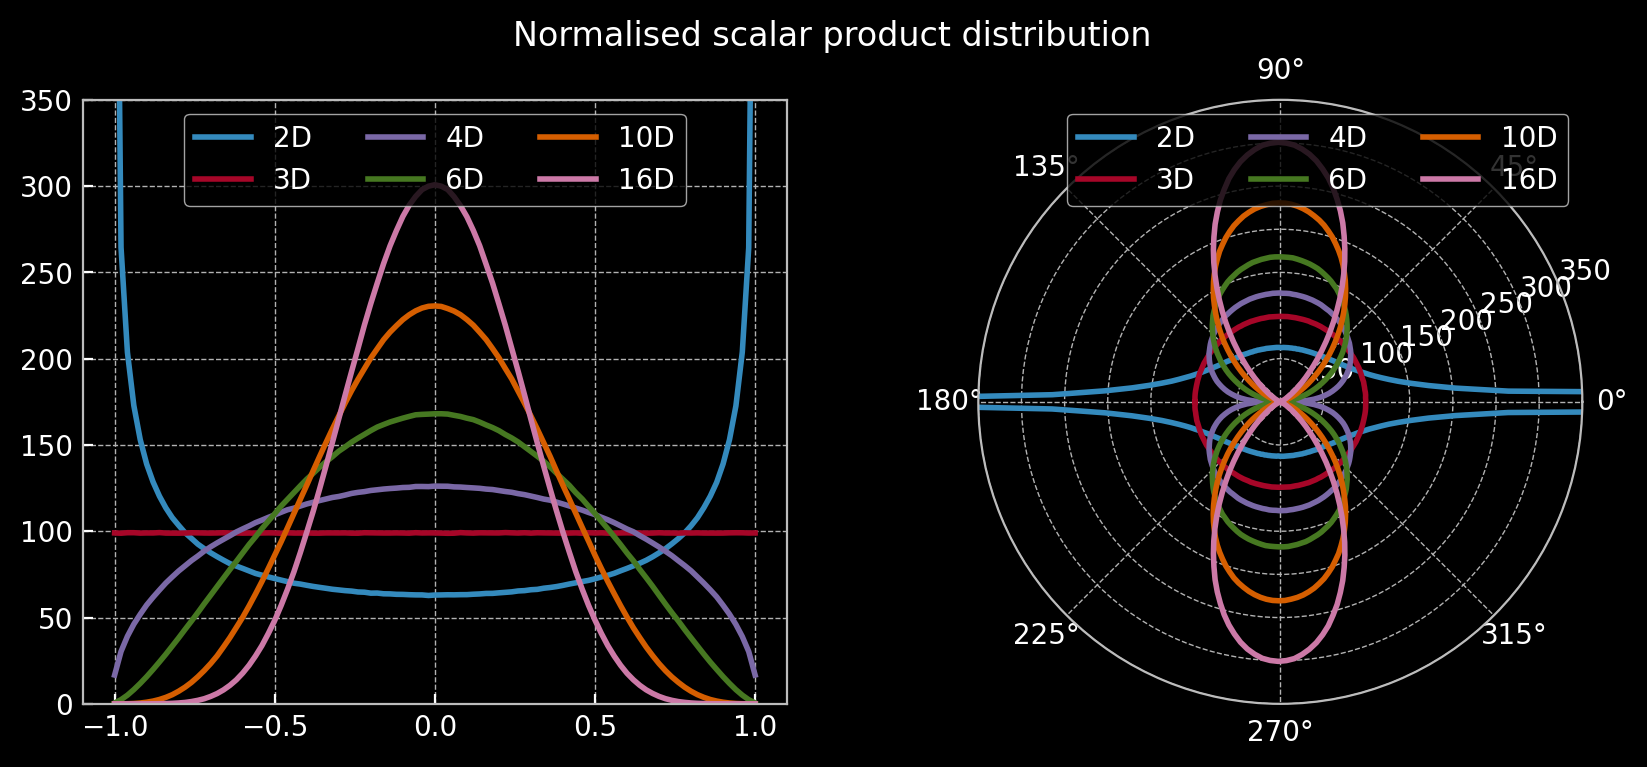

In [8]:
# Compute the histogram of points uniformly distributed on a unit sphere in d dimensions
bins = 101
N = 10_000
d_range = (2, 3, 4, 6, 10, 16); z = 1

ax1 = subplot(121)
ax2 = subplot(122, projection='polar')
for d in d_range:
    A = torch.nn.functional.normalize(torch.randn(N, d), 2, 1)
    B = torch.nn.functional.normalize(torch.randn(N, d), 2, 1)
    h = torch.histc((A @ B.t()).view(-1), bins, -1, 1) / N
    ax1.plot(torch.linspace(-1, 1, bins).numpy(), h.numpy())
    ax2.plot(π * torch.linspace(-1, +1, 2 * bins).numpy(), torch.cat((h, h)).numpy())
ax1.legend([f'{d}D' for d in d_range], ncol=3)
ax1.set_ylim(0, 350)
ax2.legend([f'{d}D' for d in d_range], ncol=3)
ax2.set_rlim(0, 350)
suptitle('Normalised scalar product distribution')

These curves are simply the probability density function of a $\Gamma$ distribution, with $\alpha = \beta = (D - 1) / 2$.
See why this is the case [here](https://stats.stackexchange.com/a/85977/31844).
More about curse of dimensionality and almost orthogonality [here](https://www.cs.princeton.edu/courses/archive/fall15/cos521/lecnotes/lec12.pdf).

$$\Vert a - b \Vert = \sqrt{\Vert a \Vert^2 + \Vert b \Vert^2 - 2 a^\top b}$$

Text(0.5, 1.0, 'Distribution of distances in D dimensions')

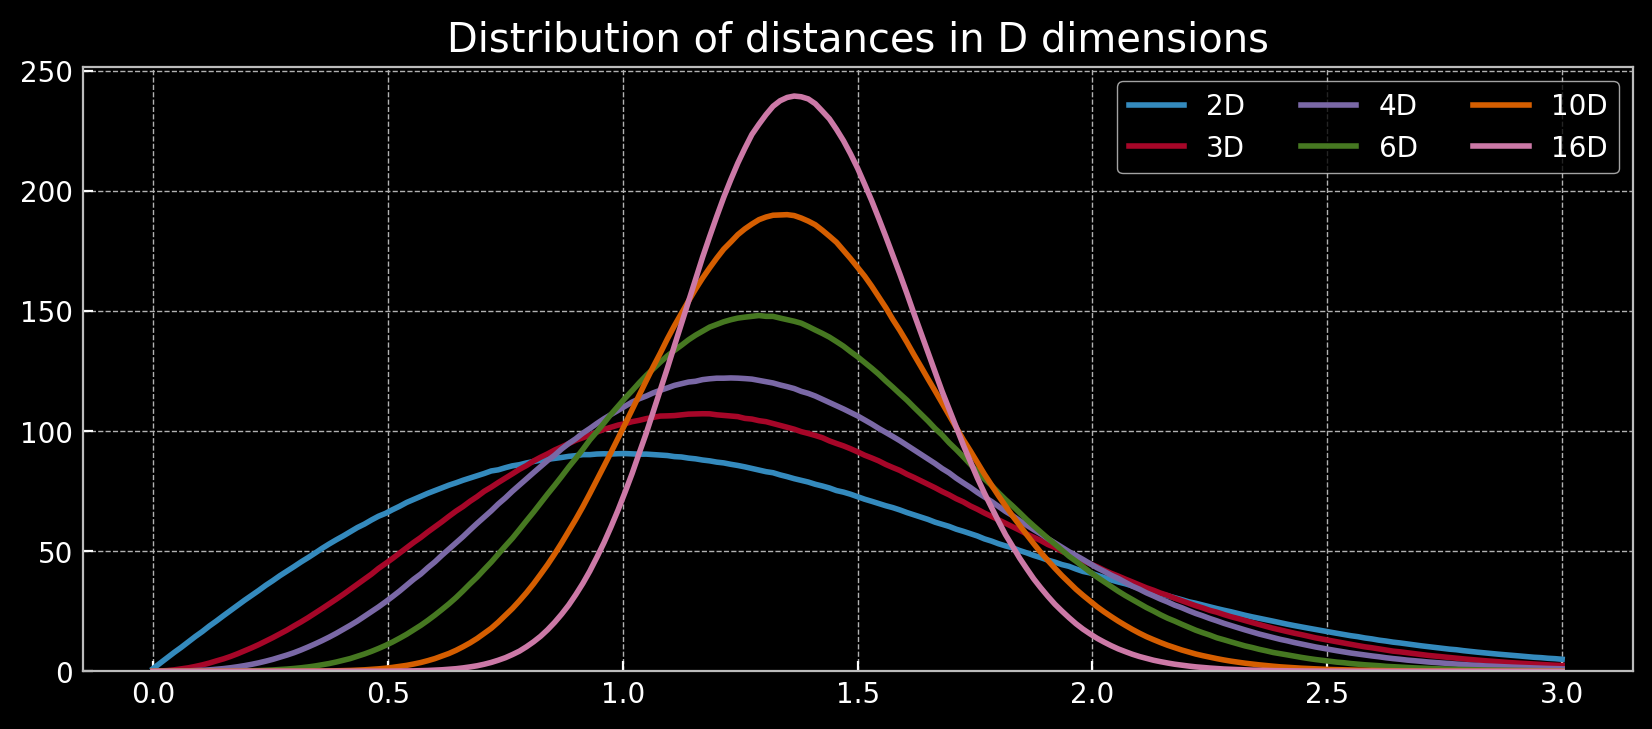

In [9]:
# Compute the histogram of points uniformly distributed on a unit sphere in d dimensions
r = 3
bins = 200 + 1
N = 10_000
d_range = (2, 3, 4, 6, 10, 16)
ax1 = subplot(111)
for d in d_range:
    A = torch.randn(N, d) / sqrt(d)
    B = torch.randn(N, d) / sqrt(d)
    h = torch.histc(torch.cdist(A[None,:,:], B[None,:,:]).view(-1), bins, 0, r) / N
    ax1.plot(torch.linspace(0, r, bins).numpy(), h.numpy())
ax1.legend([f'{d}D' for d in d_range], ncol=3)
ax1.set_ylim(ymin=0);
title('Distribution of distances in D dimensions')

Text(0.5, 0.98, 'Distribution of min distance')

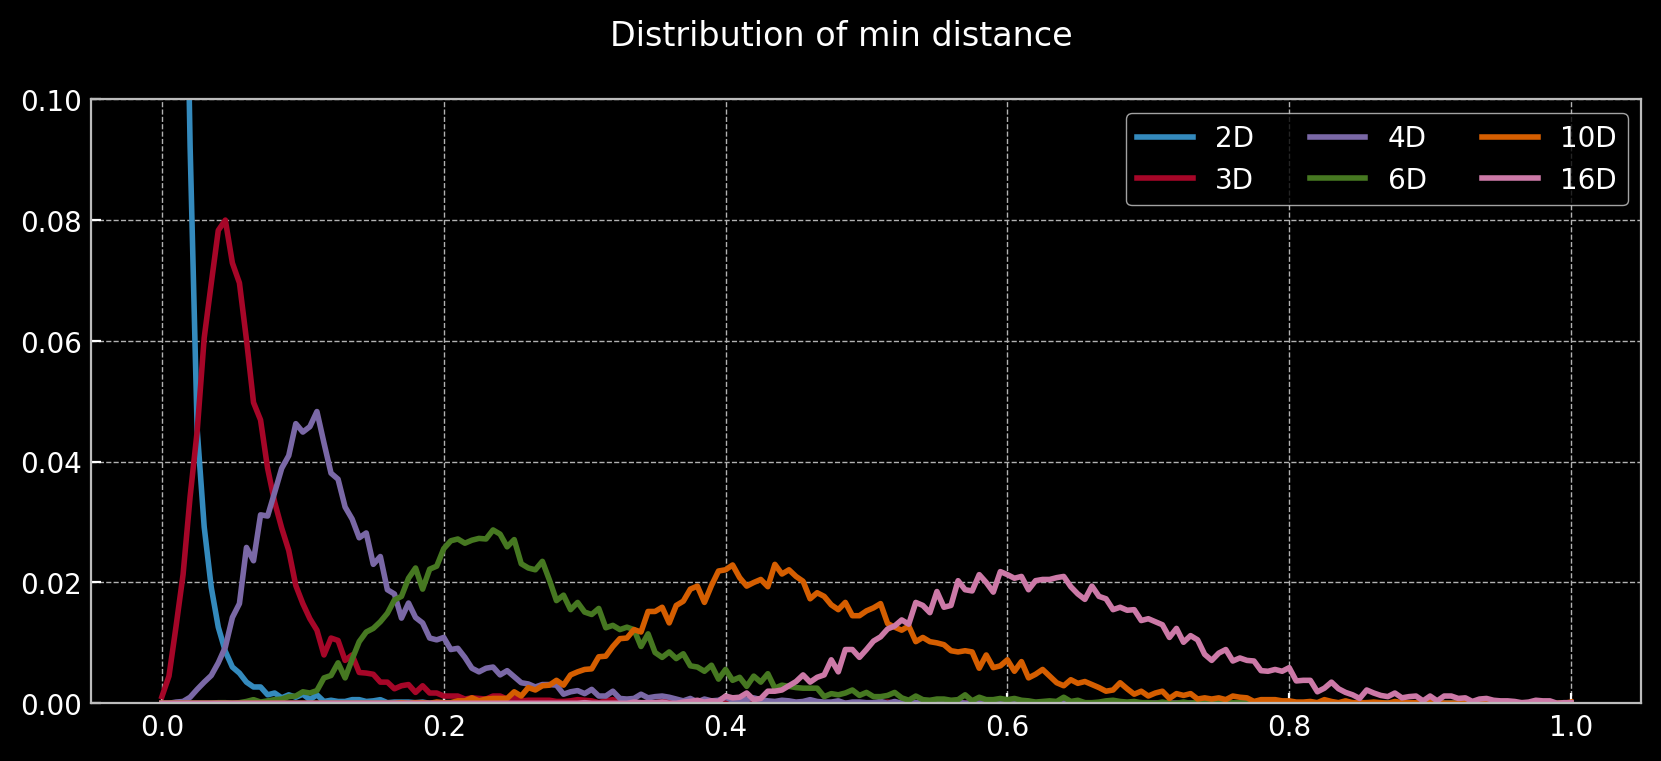

In [10]:
# Compute the histogram of points uniformly distributed on a unit sphere in d dimensions
r = 1
bins = 200 + 1
N = 10_000
d_range = (2, 3, 4, 6, 10, 16)
ax = subplot(111)
for d in d_range:
    A = torch.randn(N, d) / sqrt(d)
    B = torch.randn(N, d) / sqrt(d)
    dist = torch.cdist(A[None,:,:], B[None,:,:])
    h = torch.histc(dist.min(-1)[0].view(-1), bins, 0, r) / N
    ax.plot(torch.linspace(0, r, bins).numpy(), h.numpy())
l = [f'{d}D' for d in d_range]
ax.legend(l, ncol=3)
ax.set_ylim(ymin=0, ymax=.10)
suptitle('Distribution of min distance')

In [11]:
# Where are those two blue spikes coming from?
ϕ = arange(0, 1, 1/100) * π
f = cos(ϕ)

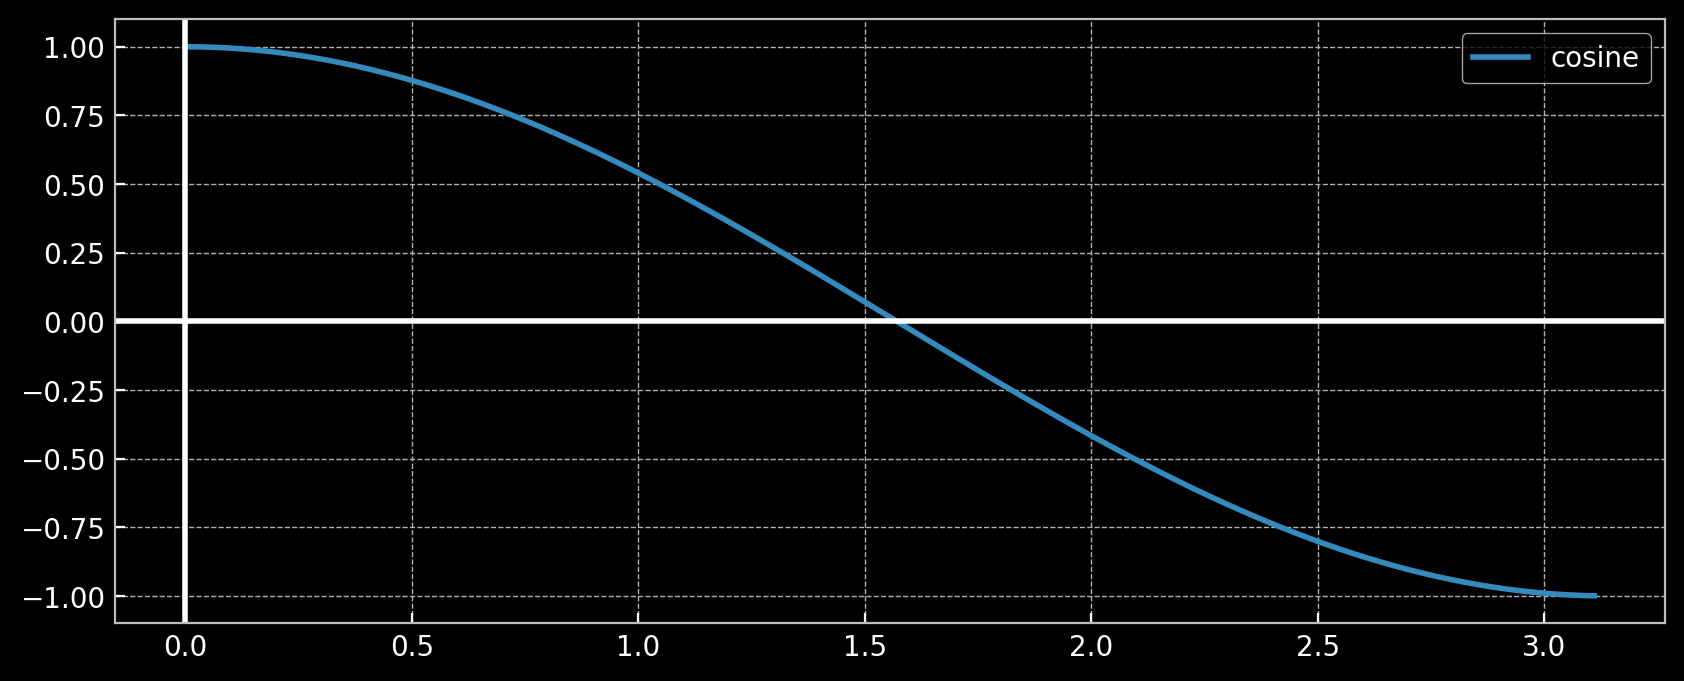

In [12]:
plot(ϕ, f)
axhline()
axvline()
legend(['cosine'])

In [13]:
c = arange(-1+1/100, 1, 1/100)
g = arccos(c)

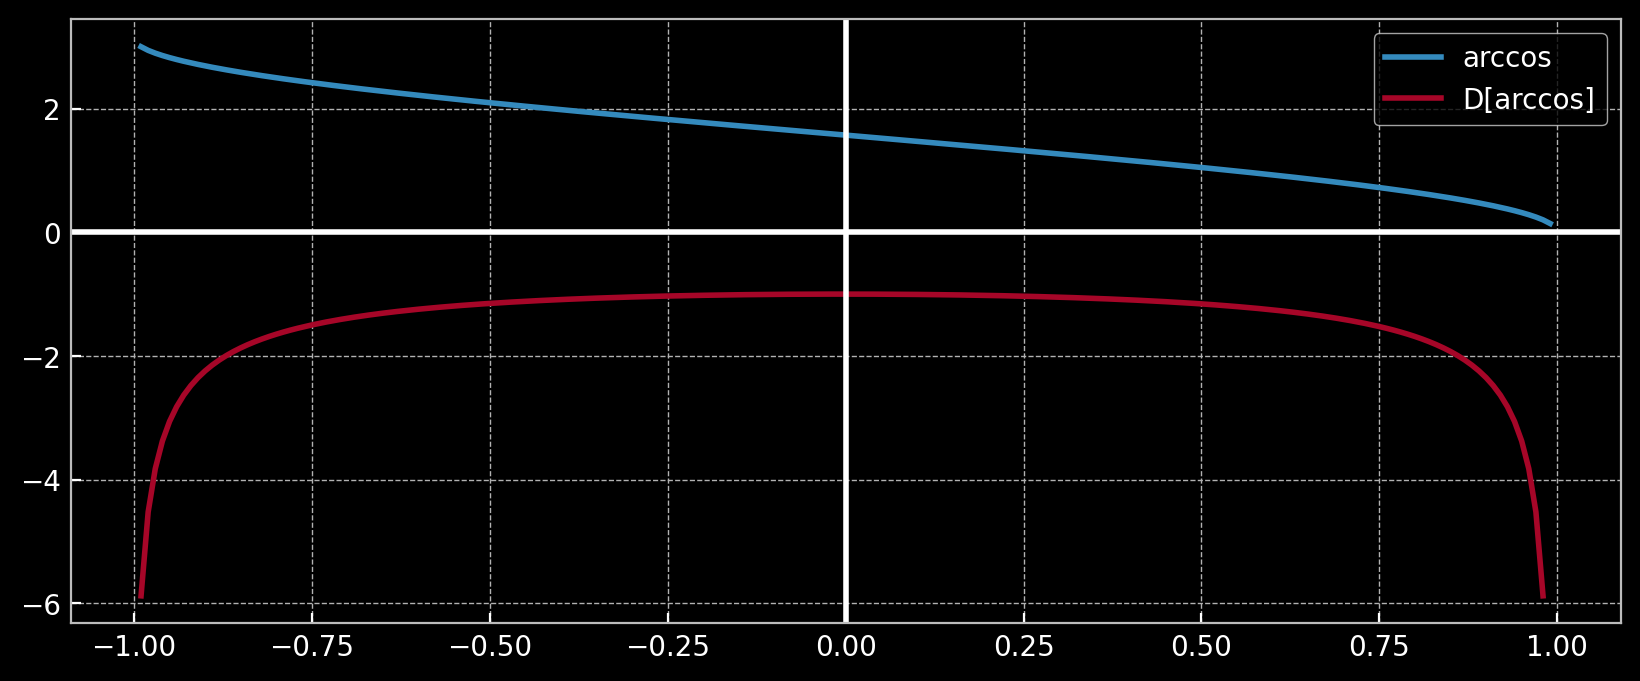

In [14]:
plot(c, g)
plot(c[:-1], (g[1:]-g[:-1])*100)
legend(['arccos', 'D[arccos]'])
axhline()
axvline()